In [1]:
import pandas as pd
from src.machine_learning import test

In [3]:
TEST_DATA = pd.read_csv('../drive_data/datasets/prediction_outputs/test_data.csv')
TEST_DATA = TEST_DATA[TEST_DATA['Simulation_Resistance'] > 1]
TEST_DATA = TEST_DATA.sample(500)
TEST_DATA.reset_index(drop=True, inplace=True)
TEST_DATA

,Simulation_Number,Maze_Name,Total_Length,Corner,Width,Height,Fillet_Radius,Simulation_Resistance
0,38280,Maze_200,41.00,48,0.07,0.20,0.07,1.33
1,8272,Maze_44,43.00,0,0.05,0.10,0.03,8.92
2,8879,Maze_47,59.00,0,0.06,0.20,0.05,3.02
3,18154,Maze_95,43.00,48,0.09,0.08,0.05,3.56
4,62070,Maze_70,17.00,16,0.07,0.06,0.07,4.16
...,...,...,...,...,...,...,...,...
495,33939,Maze_177,65.00,0,0.15,0.05,0.15,8.51
496,35691,Maze_186,23.00,22,0.20,0.05,0.20,1.93
497,32264,Maze_169,31.00,34,0.05,0.07,0.04,11.17
498,36049,Maze_188,30.00,36,0.15,0.05,0.09,3.68


In [4]:
FEATURE_COLUMN_NAMES = ['Total_Length', 'Corner', 'Width', 'Height', 'Fillet_Radius']
TARGET_COLUMN_NAME = 'Simulation_Resistance'

0 - Base model prediction: BaggingRegressor, Prediction: 1.3296048665583, Real value: 1.3259098312894
1 - Base model prediction: BaggingRegressor, Prediction: 8.852338340738532, Real value: 8.92083061580188
2 - Base model prediction: LGBMRegressor, Prediction: 3.179055967433775, Real value: 3.02301647965018
3 - Base model prediction: BaggingRegressor, Prediction: 3.5590768200066294, Real value: 3.5632176701319
4 - Base model prediction: BaggingRegressor, Prediction: 4.196500303506272, Real value: 4.16121190046795
5 - Base model prediction: BaggingRegressor, Prediction: 3.8800962977920386, Real value: 3.92996473420676
6 - Base model prediction: BaggingRegressor, Prediction: 2.585926588746177, Real value: 2.6156863220114
7 - Base model prediction: BaggingRegressor, Prediction: 5.983397241797832, Real value: 5.95942701957773
8 - Base model prediction: BaggingRegressor, Prediction: 1.8617917023331672, Real value: 1.84071183565757
9 - Base model prediction: BaggingRegressor, Prediction: 4.7

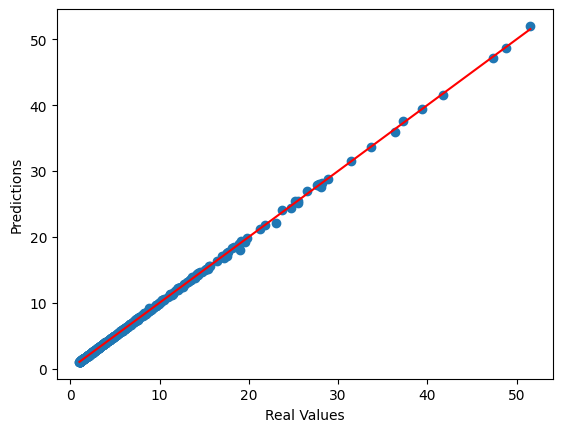

In [5]:
TEST_RMSE, TEST_MAPE = test(data_df=TEST_DATA,
                            feature_column_names=FEATURE_COLUMN_NAMES,
                            target_column_name=TARGET_COLUMN_NAME,
                            upload_model=True,
                            base_models_path='../drive_data/pickles/base_learner_pickles/',
                            meta_model_path='../drive_data/pickles/meta_learner_pickles/',
                            plot=True)

In [5]:
TEST_MAPE

0.0037107115725106095

In [6]:
from src import PredictionModel

pred_model = PredictionModel(base_learners_pickle_path='../drive_data/pickles/base_learner_pickles/',
                             meta_learner_pickle_path='../drive_data/pickles/meta_learner_pickles/')

In [9]:
feature_1 = {'Total_Length': 172.5, 'Corner': 102, 'Width': 0.05, 'Height': 0.05, 'Fillet_Radius': 0.04}
feature_2 = {'Total_Length': 179.5, 'Corner': 112, 'Width': 0.05, 'Height': 0.05, 'Fillet_Radius': 0.04}
# Predicted resistance: 64.61597442626953
prediction_1 = pred_model.predict(feature_1)
prediction_2 = pred_model.predict(feature_2)
prediction_1, prediction_2

(64.61597442626953, 64.61597442626953)

In [11]:
from src.machine_learning import read_data

SIMULATION_RESULTS_CSVS_PATH: list[str] = ['../drive_data/datasets/simulations/Simulation_Lib_5.csv',
                                               '../drive_data/datasets/simulations/Simulation_Lib_6.csv',
                                               '../drive_data/datasets/simulations/longest_shortest_simulations.csv']
ALL_DATA: pd.DataFrame = read_data(SIMULATION_RESULTS_CSVS_PATH)
ALL_DATA

,Simulation_Number,Maze_Name,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Pressure_Difference,Flow_Rate,Simulation_Resistance,Theoretical_Resistance
0,1,Maze_1,0.50,10,30.00,34,0.05,0.05,0.03,10,0.49,20.61,23.63
1,2,Maze_1,0.50,10,30.00,34,0.05,0.05,0.04,10,0.49,20.49,23.63
2,3,Maze_1,0.50,10,30.00,34,0.05,0.05,0.05,10,0.49,20.38,23.63
3,4,Maze_1,0.50,10,30.00,34,0.05,0.06,0.03,10,0.70,14.38,20.74
4,5,Maze_1,0.50,10,30.00,34,0.05,0.06,0.04,10,0.70,14.29,20.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92155,764,North_Shortest,0.50,10,10.50,1,0.20,0.15,0.16,10,196.61,0.05,0.05
92156,765,North_Shortest,0.50,10,10.50,1,0.20,0.15,0.20,10,196.92,0.05,0.05
92157,766,North_Shortest,0.50,10,10.50,1,0.20,0.20,0.12,10,369.56,0.03,0.03
92158,767,North_Shortest,0.50,10,10.50,1,0.20,0.20,0.16,10,370.19,0.03,0.03


In [12]:
# find the row with feature_1
feature_1_row = ALL_DATA[(ALL_DATA['Width'] == feature_1['Width']) &
                         (ALL_DATA['Height'] == feature_1['Height']) &
                         (ALL_DATA['Fillet_Radius'] == feature_1['Fillet_Radius'])]
feature_1_row

,Simulation_Number,Maze_Name,Step_Size,Side_Length,Total_Length,Corner,Width,Height,Fillet_Radius,Pressure_Difference,Flow_Rate,Simulation_Resistance,Theoretical_Resistance
1,2,Maze_1,0.50,10,30.00,34,0.05,0.05,0.04,10,0.49,20.49,23.63
193,194,Maze_2,0.50,30,30.00,0,0.05,0.05,0.04,10,0.48,20.90,23.63
385,386,Maze_3,0.50,10,39.00,44,0.05,0.05,0.04,10,0.38,26.64,30.72
577,578,Maze_4,0.50,39,39.00,0,0.05,0.05,0.04,10,0.37,27.17,30.72
769,770,Maze_5,0.50,10,26.00,28,0.05,0.05,0.04,10,0.56,17.77,20.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91201,42434,Maze_222,0.50,5,16.00,24,0.05,0.05,0.04,10,0.92,10.86,12.60
91393,2,East_Longest,0.50,10,180.50,86,0.05,0.05,0.04,10,0.08,124.34,142.17
91585,194,North_Longest,0.50,10,180.50,69,0.05,0.05,0.04,10,0.08,124.55,142.17
91777,386,East_Shortest,0.50,10,10.50,0,0.05,0.05,0.04,10,1.44,6.97,8.27
